In [2]:
%pylab inline
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [3]:
from sklearn import datasets

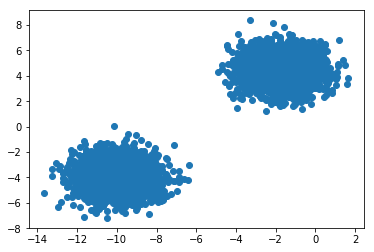

In [26]:
from keras import models, layers

Epoch 1/12
5000/5000 [==============================] - 0s 50us/step - loss: 0.5656 - acc: 0.7630
Epoch 2/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.3511 - acc: 0.8372
Epoch 3/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.2905 - acc: 0.8732
Epoch 4/12
5000/5000 [==============================] - 0s 12us/step - loss: 0.2517 - acc: 0.8978
Epoch 5/12
5000/5000 [==============================] - 0s 12us/step - loss: 0.2295 - acc: 0.8980
Epoch 6/12
5000/5000 [==============================] - 0s 12us/step - loss: 0.1763 - acc: 0.9414
Epoch 7/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.1506 - acc: 0.9512
Epoch 8/12
5000/5000 [==============================] - 0s 12us/step - loss: 0.1225 - acc: 0.9602
Epoch 9/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.1052 - acc: 0.9666
Epoch 10/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.0979 - acc: 0.9674
Epoch 11/12
5000/50

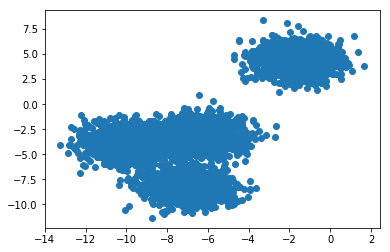

In [43]:
nc= 4
X, y = datasets.make_blobs(5000, 2, centers = nc, random_state=1)

fig, ax = subplots()
ax.scatter(X[:,0],X[:,1])

model = models.Sequential([
    layers.Dense(1500, activation='relu'),
    layers.Dense(nc, activation='softmax'),
])

y = keras.utils.to_categorical(y, nc)
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss='categorical_crossentropy', 
            metrics=['accuracy'])
model.fit(X, y, epochs=12, batch_size=128)

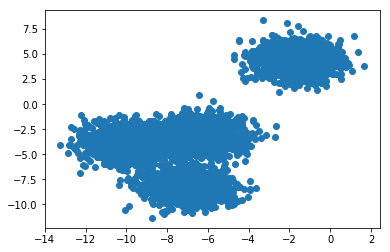

In [51]:
nc= 4
X, y = datasets.make_blobs(5000, 2, centers = nc, random_state=1)

fig, ax = subplots()
ax.scatter(X[:,0],X[:,1])

model = models.Sequential([
    layers.Dense(1500, activation='relu'),
    layers.Dense(nc, activation='softmax'),
])

y = keras.utils.to_categorical(y, nc)

def generator():
    while 1:
        for row in range(len(X)):
            yield ({'input': X[row], 'output': y[row]})

model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss='categorical_crossentropy', 
            metrics=['accuracy'])
#model.fit(X, y, epochs=12, batch_size=


In [56]:
model.fit(X, y, epochs=12, batch_size=128)

Epoch 1/12
5000/5000 [==============================] - 0s 56us/step - loss: 0.7862 - acc: 0.7212
Epoch 2/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.5252 - acc: 0.7568
Epoch 3/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.4616 - acc: 0.7734
Epoch 4/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.4282 - acc: 0.7960
Epoch 5/12
5000/5000 [==============================] - 0s 11us/step - loss: 0.4083 - acc: 0.8078
Epoch 6/12
5000/5000 [==============================] - 0s 12us/step - loss: 0.3934 - acc: 0.8190
Epoch 7/12
5000/5000 [==============================] - 0s 12us/step - loss: 0.3811 - acc: 0.8222
Epoch 8/12
5000/5000 [==============================] - 0s 13us/step - loss: 0.3721 - acc: 0.8234
Epoch 9/12
5000/5000 [==============================] - 0s 13us/step - loss: 0.3632 - acc: 0.8278
Epoch 10/12
5000/5000 [==============================] - 0s 13us/step - loss: 0.3571 - acc: 0.8312
Epoch 11/12
5000/50

In [54]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
            metrics=['accuracy'])


In [57]:
model.fit_generator(generator=generator, steps_per_epoch=10, epochs=12)

Epoch 1/12


TypeError: 'function' object is not an iterator